<a href="https://colab.research.google.com/github/abhaymise/tutorials/blob/main/ai/generative-ai/dreambooth/dreambooth_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@markdown Check type of GPU and VRAM available.
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15101 MiB


In [ ]:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pip install -qq git+https://github.com/ShivamShrirao/diffusers
%pip install -q -U --pre triton
%pip install -q accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors
!pip install -U xformers --index-url https://download.pytorch.org/whl/cu118

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━

In [ ]:
PROJECT_ROOT = "/content/drive/MyDrive/MyProjects/generative_projects/generative-ai/dreambooth"
MODEL_DIR = f"{PROJECT_ROOT}/model/weights/abhay/2000"
CKPT_PATH =f"{PROJECT_ROOT}/model/weights/abhay/2000/model.ckpt"
WEIGHTS_DIR = MODEL_DIR
generated_image_dir = f"{PROJECT_ROOT}/generation/abhay"
!mkdir -p $generated_image_dir

In [ ]:
import uuid
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, DDIMScheduler
from IPython.display import display

def generate_images(
                    pipe,
                    prompt,negative_prompt,
                    num_samples,
                    num_inference_steps,
                    guidance_scale,
                    g_cuda,
                    height,width):
  with autocast("cuda"), torch.inference_mode():
    images = pipe(
        prompt,
        height=height,
        width=width,
        negative_prompt=negative_prompt,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=g_cuda
    ).images
  return images

In [ ]:
model_path = WEIGHTS_DIR             # If you want to use previously trained model saved in gdrive, replace this with the full path of model in gdrive
model_path

'/content/drive/MyDrive/MyProjects/generative_projects/generative-ai/dreambooth/model/weights/abhay/2000'

In [ ]:

pipe = StableDiffusionPipeline.from_pretrained(model_path,
                                               safety_checker=None,
                                               torch_dtype=torch.float16).to("cuda")
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.enable_xformers_memory_efficient_attention()
g_cuda = None

#@markdown Can set random seed here for reproducibility.
g_cuda = torch.Generator(device='cuda')
seed = 52362 #@param {type:"number"}
g_cuda.manual_seed(seed)


/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [ ]:
# good_prompts = ["a black and white shirtless full body picture of abhay person having a body like john abraham"]

  0%|          | 0/50 [00:00<?, ?it/s]

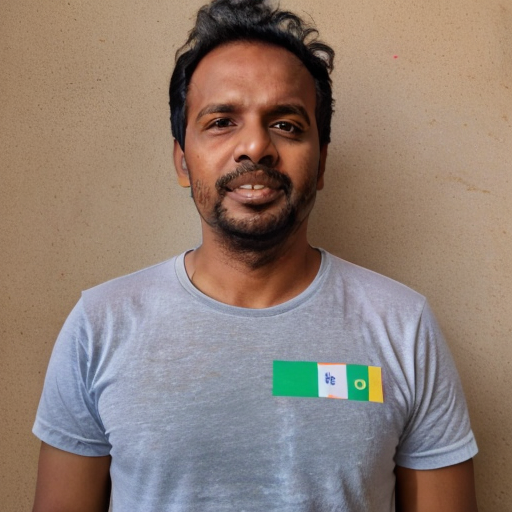

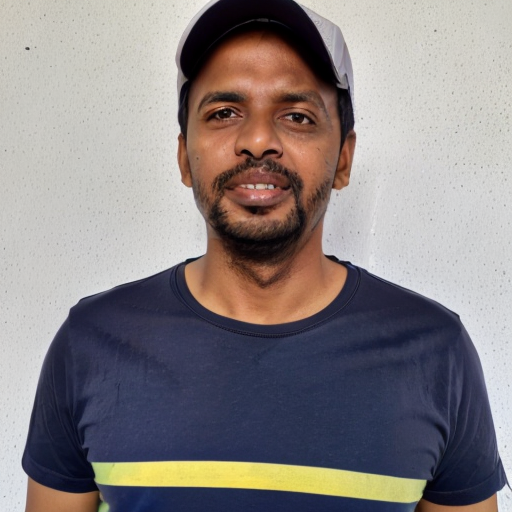

In [ ]:
#@title Run for generating images.

prompt = "an image of ((abhay person)) wearing a iron man in a stadium" #@param {type:"string"}
negative_prompt = "moth open, spread hair" #@param {type:"string"}
num_samples = 10 #@param {type:"number"}
guidance_scale = 9.5 #@param {type:"number"}
num_inference_steps = 50 #@param {type:"number"}
height = 512 #@param {type:"number"}
width = 512 #@param {type:"number"}


images = generate_images(pipe,
                    prompt,negative_prompt,
                    num_samples,
                    num_inference_steps,
                    guidance_scale,
                    g_cuda,
                    height,width)
for img in images:
  image_name = f"{str(uuid.uuid4())}.jpg"
  image_path = f"{generated_image_dir}/{image_name}"
  img.save(image_path)
  display(img)
